# Exploratory data analysis (EDA) of supermarkets data

## Libraries and settings

In [1]:
# Libraries
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image

from sklearn import tree
from sklearn.metrics import RocCurveDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Show current working directory
print(os.getcwd())

/Users/miroduman/Desktop/data analytics/week_9


### Importing the enriched supermarkets data + summary statistc

In [2]:
# Read and select variables
df_supermarket_orig = pd.read_csv("supermarkets_data_enriched.csv", sep=",", encoding="utf-8")

# Number of rows and columns
print(df_supermarket_orig.shape)

# First records
df_supermarket_orig.head(5)

(3242, 18)


,Unnamed: 0,type,id,lat,lon,brand,shop,addr:city,addr:housenumber,addr:postcode,geometry,index_right,bfs_name,bfs_number,pop,pop_dens,frg_pct,emp
0,0,node,33126515,47.155616,9.037915,Spar,supermarket,NaN,NaN,NaN,POINT (9.0379152 47.1556157),227,Schänis,3315,3876,97.142857,13.054696,1408.0
1,1,node,280130028,47.155492,9.039666,ALDI,supermarket,Schänis,3,8718.0,POINT (9.0396663 47.1554921),227,Schänis,3315,3876,97.142857,13.054696,1408.0
2,2,node,6122906632,47.158959,9.044477,Denner,supermarket,Schänis,14,8718.0,POINT (9.0444769 47.1589589),227,Schänis,3315,3876,97.142857,13.054696,1408.0
3,3,node,9019298862,47.155185,9.038472,Lidl,supermarket,NaN,NaN,NaN,POINT (9.0384722 47.1551854),227,Schänis,3315,3876,97.142857,13.054696,1408.0
4,4,node,36726161,47.226191,8.980329,Migros,supermarket,Uznach,25,8730.0,POINT (8.9803292 47.2261912),1217,Uznach,3339,6489,860.610080,27.862537,3500.0


## Count and remove missing values

In [3]:
# Count missing values
print(df_supermarket_orig.isna().sum())

# Remove missing values
df_supermarkets = df_supermarket_orig.dropna(subset=['lat',
                                                 'lon',
                                                     'pop',
                                                    'pop_dens',
                                                    'frg_pct',
                                                    'emp', 'brand'])

Unnamed: 0             0
type                   0
id                     0
lat                    0
lon                    0
brand               1233
shop                   0
addr:city           1795
addr:housenumber    1690
addr:postcode       1721
geometry               0
index_right            0
bfs_name               0
bfs_number             0
pop                    0
pop_dens               0
frg_pct                0
emp                   45
dtype: int64


### Create a subset named ‘df_sub’ with only ‘Migros’ and ‘Volg’ as brands

In [4]:
df_sub = df_supermarkets.loc[df_supermarkets['brand'].isin(['Migros', 'Volg'])]

### Create train and test samples (train = 80%, test = 20% of the data)

In [5]:
# Create train and test samples
X_train, X_test, y_train, y_test = train_test_split(df_sub[['lat',
                                                 'lon',
                                                     'pop',
                                                    'pop_dens',
                                                    'frg_pct',
                                                    'emp']],
                                                    df_sub['brand'],
                                                    test_size=0.20,
                                                    random_state=42)

# Show X_train
print('X_train:')
print(X_train.head(), '\n')

# Show y_train
print('y_train:')
print(y_train.head())

X_train:
            lat       lon     pop      pop_dens    frg_pct       emp
427   46.767777  9.062487    1728     17.891903   8.217593     725.0
271   47.552670  7.592713  173232   7263.396226  37.955459  185432.0
1149  46.203871  6.146234  203951  12810.992462  47.954656  186620.0
2655  46.774599  9.207659    4757     35.638298  16.312802    3229.0
2369  47.126317  7.246363    6872   4521.052632  26.062282    3185.0 

y_train:
427       Volg
271     Migros
1149    Migros
2655    Migros
2369    Migros
Name: brand, dtype: object


### Fit the classification tree model and make predictions

In [6]:
# Initialize the classification tree model 
clf = DecisionTreeClassifier(random_state=20, 
                             max_depth=8)

# Train the classification tree model 
clf = clf.fit(X_train, y_train)

# Make model predictions
y_pred = clf.predict(X_test)
y_pred

array(['Migros', 'Migros', 'Migros', 'Migros', 'Volg', 'Migros', 'Migros',
       'Migros', 'Volg', 'Migros', 'Volg', 'Migros', 'Migros', 'Migros',
       'Migros', 'Volg', 'Volg', 'Volg', 'Volg', 'Volg', 'Volg', 'Migros',
       'Volg', 'Migros', 'Migros', 'Volg', 'Volg', 'Migros', 'Volg',
       'Migros', 'Migros', 'Volg', 'Migros', 'Migros', 'Migros', 'Volg',
       'Migros', 'Migros', 'Migros', 'Migros', 'Migros', 'Migros', 'Volg',
       'Volg', 'Volg', 'Migros', 'Volg', 'Volg', 'Migros', 'Migros',
       'Migros', 'Migros', 'Migros', 'Migros', 'Migros', 'Migros', 'Volg',
       'Migros', 'Volg', 'Volg', 'Migros', 'Migros', 'Migros', 'Migros',
       'Migros', 'Migros', 'Migros', 'Migros', 'Volg', 'Migros', 'Migros',
       'Migros', 'Volg', 'Migros', 'Migros', 'Volg', 'Migros', 'Migros',
       'Migros', 'Volg', 'Volg', 'Migros', 'Volg', 'Migros', 'Migros',
       'Volg', 'Migros', 'Migros', 'Migros', 'Migros', 'Volg', 'Volg',
       'Migros', 'Migros', 'Migros', 'Migros', 'Migro

### Print text representation of the classification tree

In [7]:
# Text representation of the classification tree
text_rep = tree.export_text(clf, 
                            feature_names=list(X_train.columns))

# Print text_representation
print(text_rep)

|--- emp <= 1399.00
|   |--- pop <= 2598.50
|   |   |--- lat <= 46.35
|   |   |   |--- emp <= 512.50
|   |   |   |   |--- emp <= 244.50
|   |   |   |   |   |--- class: Volg
|   |   |   |   |--- emp >  244.50
|   |   |   |   |   |--- class: Migros
|   |   |   |--- emp >  512.50
|   |   |   |   |--- class: Volg
|   |   |--- lat >  46.35
|   |   |   |--- emp <= 824.00
|   |   |   |   |--- class: Volg
|   |   |   |--- emp >  824.00
|   |   |   |   |--- emp <= 856.50
|   |   |   |   |   |--- class: Migros
|   |   |   |   |--- emp >  856.50
|   |   |   |   |   |--- lat <= 47.58
|   |   |   |   |   |   |--- lat <= 46.80
|   |   |   |   |   |   |   |--- lon <= 8.56
|   |   |   |   |   |   |   |   |--- class: Volg
|   |   |   |   |   |   |   |--- lon >  8.56
|   |   |   |   |   |   |   |   |--- class: Migros
|   |   |   |   |   |   |--- lat >  46.80
|   |   |   |   |   |   |   |--- class: Volg
|   |   |   |   |   |--- lat >  47.58
|   |   |   |   |   |   |--- class: Migros
|   |--- pop >  2598.

## Visualize the classification tree

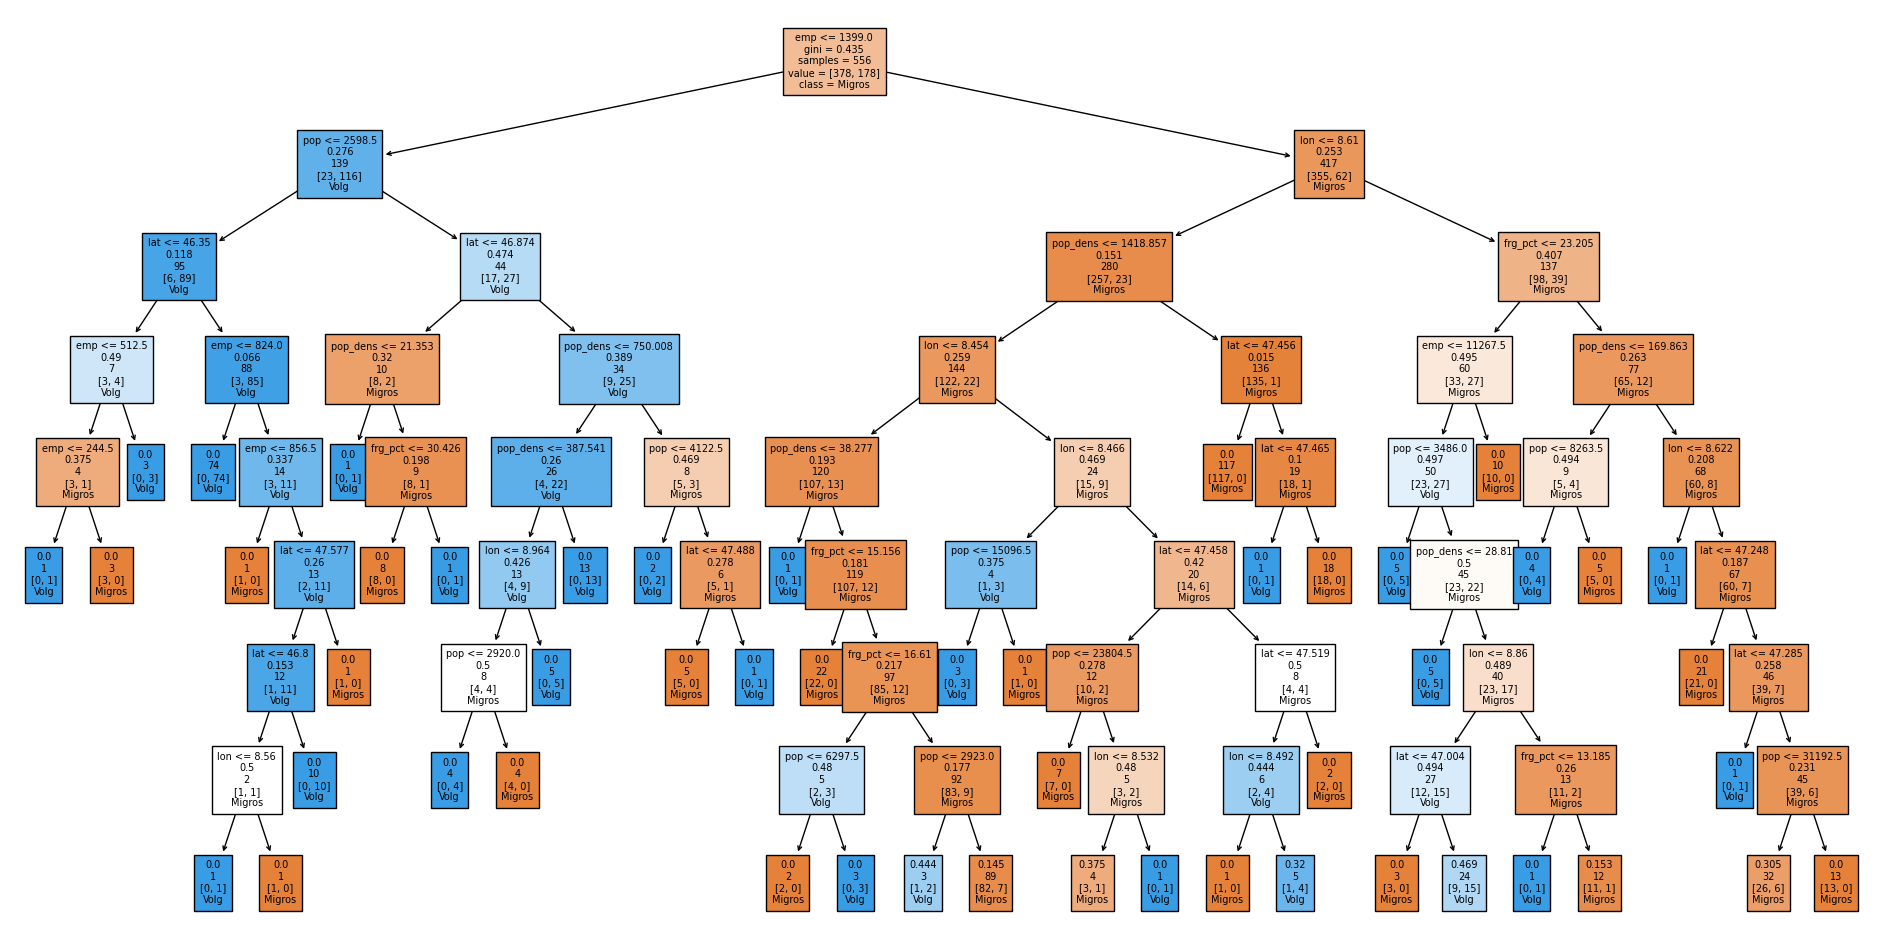

In [8]:
# For the meaning of numbers in boxes see root node
fig = plt.figure(figsize=(24,12))
tree_plot = tree.plot_tree(clf, 
                   feature_names=list(X_train.columns),  
                   class_names=['Migros', 'Volg'],
                   filled=True,
                   fontsize=7,
                   label='root')

In [9]:
# Initialize the random forest classifier
rfc = RandomForestClassifier(random_state=10, max_depth=5)

# Train the random forest classifier
rfc = rfc.fit(X_train, y_train)

# Predict the target variable (0 = not survived, 1 = survived)
y_pred_rf = rfc.predict(X_test)

print('Predicted target variable (0 = not survived, 1 = survived)')
y_pred_rf

Predicted target variable (0 = not survived, 1 = survived)


array(['Migros', 'Migros', 'Migros', 'Migros', 'Volg', 'Migros', 'Migros',
       'Migros', 'Volg', 'Migros', 'Volg', 'Migros', 'Migros', 'Migros',
       'Migros', 'Volg', 'Volg', 'Volg', 'Volg', 'Volg', 'Volg', 'Migros',
       'Volg', 'Migros', 'Migros', 'Volg', 'Volg', 'Migros', 'Volg',
       'Migros', 'Migros', 'Volg', 'Migros', 'Migros', 'Migros', 'Migros',
       'Migros', 'Migros', 'Migros', 'Migros', 'Migros', 'Migros', 'Volg',
       'Volg', 'Volg', 'Migros', 'Volg', 'Volg', 'Migros', 'Migros',
       'Migros', 'Migros', 'Migros', 'Migros', 'Migros', 'Migros', 'Volg',
       'Migros', 'Volg', 'Volg', 'Migros', 'Migros', 'Migros', 'Migros',
       'Migros', 'Volg', 'Migros', 'Migros', 'Migros', 'Migros', 'Migros',
       'Migros', 'Volg', 'Migros', 'Migros', 'Volg', 'Migros', 'Migros',
       'Migros', 'Migros', 'Volg', 'Migros', 'Volg', 'Migros', 'Migros',
       'Migros', 'Migros', 'Migros', 'Migros', 'Migros', 'Migros', 'Volg',
       'Migros', 'Migros', 'Migros', 'Migros'

### ROC curve and AUC

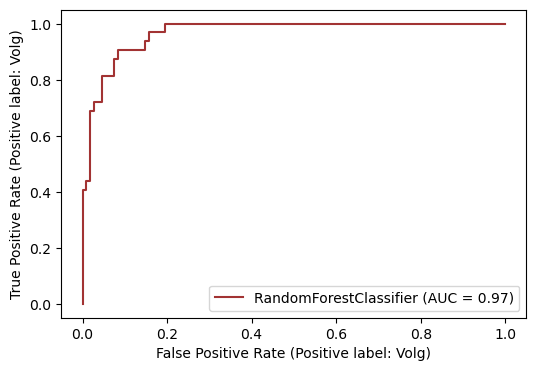

In [10]:
# Plot ROC curve and calculate AUC
plt.figure(figsize=(6,4))
ax = plt.gca()
rfc_disp = RocCurveDisplay.from_estimator(rfc, 
                                          X_test, 
                                          y_test, 
                                          ax=ax,
                                          alpha=0.8,
                                          c="darkred")
plt.show()

## Random Forest Classifier
For details see: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

### Create train and test samples (train = 80%, test = 20% of the data)

In [11]:
# Create train and test samples
X2_train, X2_test, y2_train, y2_test = train_test_split(df_sub[['lat',
                                                 'lon',
                                                     'pop',
                                                    'pop_dens',
                                                    'frg_pct',
                                                    'emp']],
                                                    df_sub['brand'],
                                                    test_size=0.20,
                                                    random_state=42)

# Show X2_train
print('X2_train:')
print(X2_train.head(), '\n')

# Show y2_train
print('y2_train:')
print(y2_train.head())

X2_train:
            lat       lon     pop      pop_dens    frg_pct       emp
427   46.767777  9.062487    1728     17.891903   8.217593     725.0
271   47.552670  7.592713  173232   7263.396226  37.955459  185432.0
1149  46.203871  6.146234  203951  12810.992462  47.954656  186620.0
2655  46.774599  9.207659    4757     35.638298  16.312802    3229.0
2369  47.126317  7.246363    6872   4521.052632  26.062282    3185.0 

y2_train:
427       Volg
271     Migros
1149    Migros
2655    Migros
2369    Migros
Name: brand, dtype: object


### Fit the Random Forest Classifier

In [12]:
# Initialize the random forest classifier
rfc = RandomForestClassifier(random_state=10, max_depth=5)

# Train the random forest classifier
rfc = rfc.fit(X2_train, y2_train)

# Predict the target variable (0 = not survived, 1 = survived)
y_pred_rf = rfc.predict(X2_test)

print('Predicted target variable (0 = not survived, 1 = survived)')
y_pred_rf

Predicted target variable (0 = not survived, 1 = survived)


array(['Migros', 'Migros', 'Migros', 'Migros', 'Volg', 'Migros', 'Migros',
       'Migros', 'Volg', 'Migros', 'Volg', 'Migros', 'Migros', 'Migros',
       'Migros', 'Volg', 'Volg', 'Volg', 'Volg', 'Volg', 'Volg', 'Migros',
       'Volg', 'Migros', 'Migros', 'Volg', 'Volg', 'Migros', 'Volg',
       'Migros', 'Migros', 'Volg', 'Migros', 'Migros', 'Migros', 'Migros',
       'Migros', 'Migros', 'Migros', 'Migros', 'Migros', 'Migros', 'Volg',
       'Volg', 'Volg', 'Migros', 'Volg', 'Volg', 'Migros', 'Migros',
       'Migros', 'Migros', 'Migros', 'Migros', 'Migros', 'Migros', 'Volg',
       'Migros', 'Volg', 'Volg', 'Migros', 'Migros', 'Migros', 'Migros',
       'Migros', 'Volg', 'Migros', 'Migros', 'Migros', 'Migros', 'Migros',
       'Migros', 'Volg', 'Migros', 'Migros', 'Volg', 'Migros', 'Migros',
       'Migros', 'Migros', 'Volg', 'Migros', 'Volg', 'Migros', 'Migros',
       'Migros', 'Migros', 'Migros', 'Migros', 'Migros', 'Migros', 'Volg',
       'Migros', 'Migros', 'Migros', 'Migros'

### Show confusion matrix and classification report

In [13]:
# Confusion matrix
print('Confusion matrix')
print(confusion_matrix(y2_test, y_pred_rf), '\n')

# Classification report
print('Classification report')
print(classification_report(y2_test, y_pred_rf))

Confusion matrix
[[100   8]
 [  4  28]] 

Classification report
              precision    recall  f1-score   support

      Migros       0.96      0.93      0.94       108
        Volg       0.78      0.88      0.82        32

    accuracy                           0.91       140
   macro avg       0.87      0.90      0.88       140
weighted avg       0.92      0.91      0.92       140



### Show feature importance

Index(['pop', 'emp', 'pop_dens', 'frg_pct', 'lon', 'lat'], dtype='object')
[0.29314672 0.2809619  0.15158357 0.13546661 0.0710002  0.06784099]


<AxesSubplot: ylabel='features'>

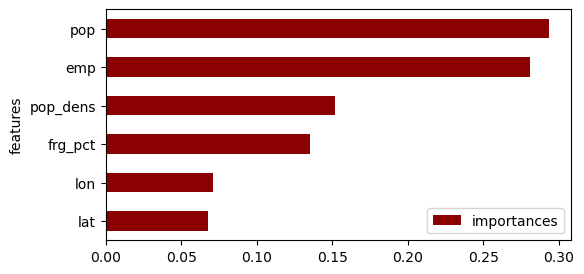

In [14]:
cols = X2_train.columns

# Derive feature importance from random forest
importances = rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print col-names and importances-values
print( cols[indices] )
print( importances[indices] )

# Barplot with feature importance
df_fi = pd.DataFrame({'features':cols,'importances': importances})
df_fi.sort_values('importances', inplace=True)
df_fi.plot(kind='barh', 
           y='importances', 
           x='features', 
           color='darkred', 
           figsize=(6,3))

### ROC curve and AUC

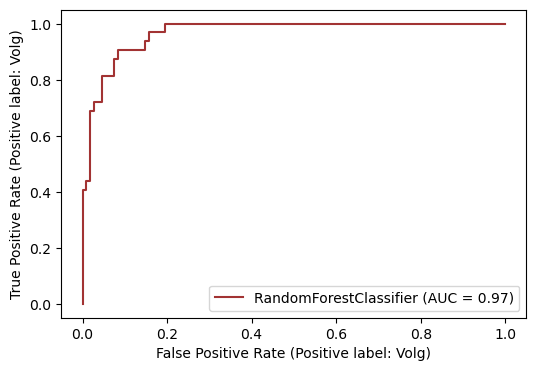

In [15]:
# Plot ROC curve and calculate AUC
plt.figure(figsize=(6,4))
ax = plt.gca()
rfc_disp = RocCurveDisplay.from_estimator(rfc, 
                                          X2_test, 
                                          y2_test, 
                                          ax=ax,
                                          alpha=0.8,
                                          c="darkred")
plt.show()

### Jupyter notebook --footer info-- (please always provide this at the end of each submitted notebook)

In [16]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
POSIX
Darwin | 22.1.0
Datetime: 2022-11-17 13:30:05
Python Version: 3.9.13
-----------------------------------
